# Titanic - Kaggle Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
import pickle
%matplotlib inline

In [2]:
pd.options.display.max_columns = None

In [3]:
df_train=pd.read_csv('./titanic/train.csv')
df_train.set_index('PassengerId', inplace=True)

In [4]:
df_test=pd.read_csv('./titanic/test.csv')
df_test.set_index('PassengerId', inplace=True)

In [5]:
df=pd.concat([df_train, df_test])

## First glance to the data

In [6]:
df.shape

(1309, 11)

In [7]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.dtypes

Survived    float64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


### Looking to the features

In [10]:
df_analyses=df_train.copy()

#### Survived

In [11]:
df_analyses['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

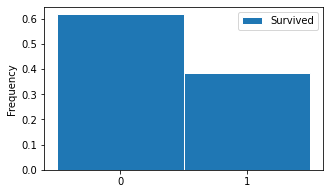

In [12]:
fig, axs = plt.subplots(1,1, figsize=(5,3))
df_analyses[['Survived']].plot(kind='hist', bins=2, range=(-0.5, 1.5), density=True, edgecolor='white', ax=axs)
axs.set_xticks([0,1])
axs.set_xticklabels([0,1])
None

#### Pclass

In [13]:
df_analyses[['Pclass']].value_counts()/1309

Pclass
3         0.375095
1         0.165011
2         0.140565
dtype: float64

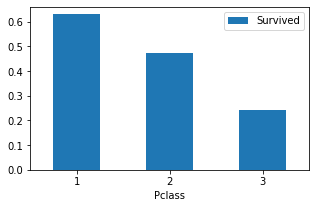

In [14]:
fig, axs = plt.subplots(1,1, figsize=(5,3))
df_analyses[['Pclass', 'Survived']].groupby('Pclass').mean().plot(kind='bar', ax=axs)
labels=axs.get_xticklabels()
axs.set_xticklabels(labels, rotation=0)
None

Clearly, the `Pclass` seems to be a good predictor: the higher the class the more the chance to survive.

#### Name

In [15]:
df_analyses['Prefix']=df_analyses['Name'].apply(lambda x: x.split(',')[1].split(' ')[1])
df_analyses['Prefix']

PassengerId
1        Mr.
2       Mrs.
3      Miss.
4       Mrs.
5        Mr.
       ...  
887     Rev.
888    Miss.
889    Miss.
890      Mr.
891      Mr.
Name: Prefix, Length: 891, dtype: object

In [16]:
df['Prefix']=df['Name'].apply(lambda x: x.split(',')[1].split(' ')[1])
df['Prefix']

PassengerId
1           Mr.
2          Mrs.
3         Miss.
4          Mrs.
5           Mr.
         ...   
1305        Mr.
1306      Dona.
1307        Mr.
1308        Mr.
1309    Master.
Name: Prefix, Length: 1309, dtype: object

In [17]:
df['Prefix'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Dr.            8
Rev.           8
Col.           4
Major.         2
Mlle.          2
Ms.            2
Mme.           1
the            1
Don.           1
Lady.          1
Capt.          1
Sir.           1
Dona.          1
Jonkheer.      1
Name: Prefix, dtype: int64

In [18]:
df_analyses['Prefix'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Sir.           1
Don.           1
Ms.            1
Mme.           1
Lady.          1
Jonkheer.      1
Name: Prefix, dtype: int64

In [19]:
df_analyses.loc[df_analyses['Name'].apply(lambda x: x.split(',')[1].split(' ')[1])=='the',:]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
PassengerId,,,,,,,,,,,,
760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,the


In [20]:
df_analyses['Prefix'].value_counts().index

Index(['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Dr.', 'Rev.', 'Mlle.', 'Major.',
       'Col.', 'the', 'Capt.', 'Sir.', 'Don.', 'Ms.', 'Mme.', 'Lady.',
       'Jonkheer.'],
      dtype='object')

In [21]:
specific_title=['Master.', 'Dr.', 'Rev.', 'Col.', 'Major.', 'Lady.', 'Sir.', 'the', 'Don.', 'Capt.', 'Jonkheer.']
values={'Mlle.': 'Miss.', 'Mme.': 'Mrs.', 'Ms.': 'Miss.'}
for t in specific_title:
    values[t]='Spec.'
df_analyses['Prefix'].replace(values, inplace=True)

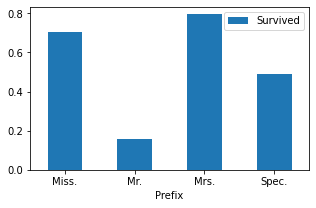

In [22]:
fig, axs = plt.subplots(1,1, figsize=(5,3))
df_analyses[['Prefix', 'Survived']].groupby('Prefix').mean().plot(kind='bar', ax=axs)
labels=axs.get_xticklabels()
axs.set_xticklabels(labels, rotation=0)
None

This constructed Prefix feature is a good predictor.

#### Sex

In [23]:
df_analyses[['Sex']].value_counts()/1309

Sex   
male      0.440794
female    0.239878
dtype: float64

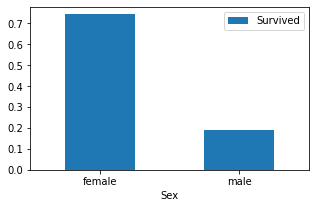

In [24]:
fig, axs = plt.subplots(1,1, figsize=(5,3))
df_analyses[['Sex', 'Survived']].groupby('Sex').mean().plot(kind='bar', ax=axs)
labels=axs.get_xticklabels()
axs.set_xticklabels(labels, rotation=0)
None

#### Age

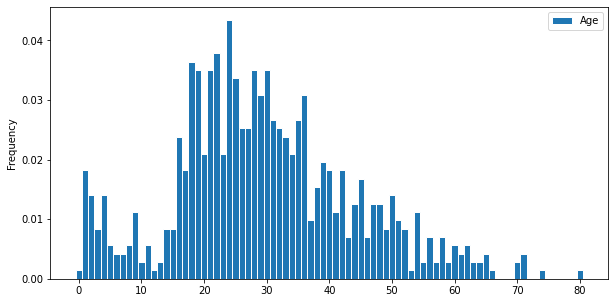

In [25]:
fig, axs = plt.subplots(1,1, figsize=(10,5))
agemin, agemax = int(df_analyses['Age'].min()), df_analyses['Age'].max()
df_analyses[['Age']].plot(kind='hist', bins=int(agemax-agemin+1), range=(agemin-0.5, agemax+0.5), density=True, edgecolor='white', ax=axs)
None

In [26]:
df_analyses['Age_binned']=df_analyses['Age'].apply(lambda x: x//5)

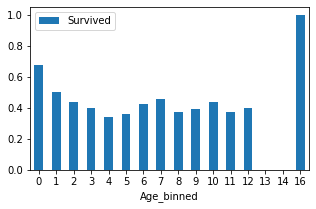

In [27]:
fig, axs = plt.subplots(1,1, figsize=(5,3))
df_analyses[['Age_binned', 'Survived']].groupby('Age_binned').mean().plot(kind='bar', ax=axs)
labels=axs.get_xticklabels()
axs.set_xticklabels([int(float(el._text)) for el in labels], rotation=0)
None

In [28]:
df_analyses.loc[df_analyses['Age']>=70,:]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Age_binned
PassengerId,,,,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Mr.,14.0
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,Mr.,14.0
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Mr.,14.0
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,Mr.,16.0
673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S,Mr.,14.0
746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,Spec.,14.0
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,Mr.,14.0


We will consider the 80-years old passenger as an outlier and remove it.

##### missing values

In [29]:
df_analyses.loc[df_analyses['Age'].isna(),:]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Age_binned
PassengerId,,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr.,NaN
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr.,NaN
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs.,NaN
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr.,NaN
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Mr.,NaN
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Miss.,NaN
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,Mr.,NaN


In [30]:
df_analyses.loc[~df_analyses['Age_binned'].isna(), ['Pclass', 'Age_binned', 'Sex']].groupby(['Pclass', 'Sex']).agg(lambda x: np.median(x))

Age_binned
Pclass Sex               
1      female         7.0
       male           8.0
2      female         5.0
       male           6.0
3      female         4.0
       male           5.0

In [31]:
def new_age(row):
    c, s, _ = row
    if (c, s) == (1, 'female'):
        return 7
    if (c,s)==(1, 'male'):
        return 8
    if (c,s)==(2, 'female'):
        return 5
    if (c,s)==(2, 'male'):
        return 6
    if (c,s)==(3, 'female'):
        return 4
    if (c,s)==(3, 'male'):
        return 5

In [32]:
df_analyses.loc[df_analyses['Age_binned'].isna(), 'Age_binned'] = df_analyses.loc[df_analyses['Age_binned'].isna(), ['Pclass', 'Sex', 'Age_binned']].apply(new_age, axis=1)

#### SibSp, Parch

<AxesSubplot:>

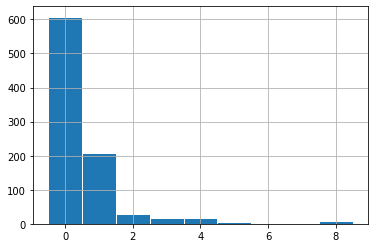

In [33]:
df_analyses['SibSp'].hist(bins=9, range=(-0.5, 8.5), edgecolor='white')

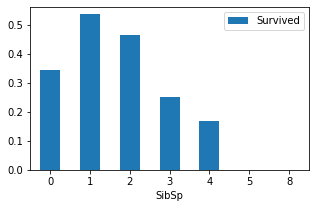

In [34]:
fig, axs = plt.subplots(1,1, figsize=(5,3))
df_analyses[['SibSp', 'Survived']].groupby('SibSp').mean().plot(kind='bar', ax=axs)
labels=axs.get_xticklabels()
axs.set_xticklabels([int(float(el._text)) for el in labels], rotation=0)
None

<AxesSubplot:>

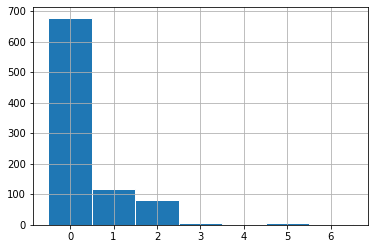

In [35]:
df_analyses['Parch'].hist(bins=7, range=(-0.5, 6.5), edgecolor='white')

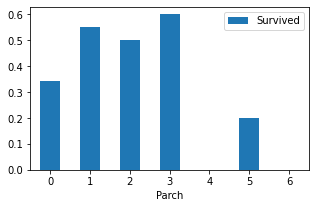

In [36]:
fig, axs = plt.subplots(1,1, figsize=(5,3))
df_analyses[['Parch', 'Survived']].groupby('Parch').mean().plot(kind='bar', ax=axs)
labels=axs.get_xticklabels()
axs.set_xticklabels([int(float(el._text)) for el in labels], rotation=0)
None

In [37]:
df_analyses['Family']=df_analyses['SibSp']+df_analyses['Parch']

<AxesSubplot:>

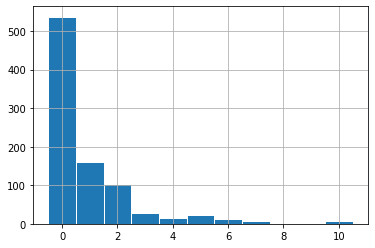

In [38]:
df_analyses['Family'].hist(bins=11, range=(-0.5, 10.5), edgecolor='white')

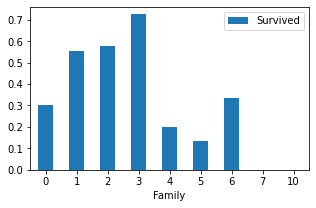

In [39]:
fig, axs = plt.subplots(1,1, figsize=(5,3))
df_analyses[['Family', 'Survived']].groupby('Family').mean().plot(kind='bar', ax=axs)
labels=axs.get_xticklabels()
axs.set_xticklabels([int(float(el._text)) for el in labels], rotation=0)
None

#### Fare

array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

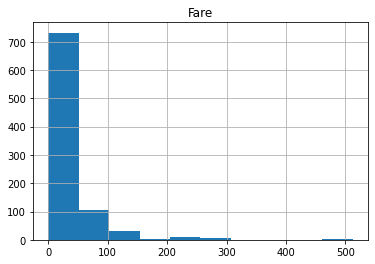

In [40]:
df_analyses[['Fare']].hist()

In [41]:
df_analyses['Fare_per_f']=df_analyses['Fare']/(df_analyses['Family']+1)

<AxesSubplot:xlabel='Pclass', ylabel='Fare_per_f'>

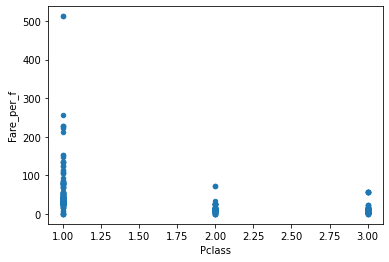

In [42]:
df_analyses[['Fare', 'Family', 'Pclass', 'Fare_per_f']].plot(kind='scatter', x='Pclass', y='Fare_per_f')

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

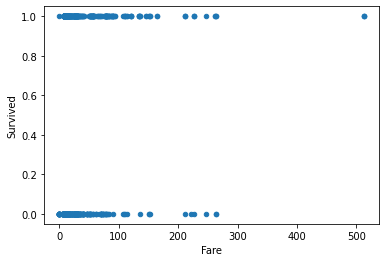

In [43]:
df_analyses[['Fare', 'Survived']].plot(kind='scatter', x='Fare', y='Survived')

<AxesSubplot:xlabel='Fare_per_f', ylabel='Survived'>

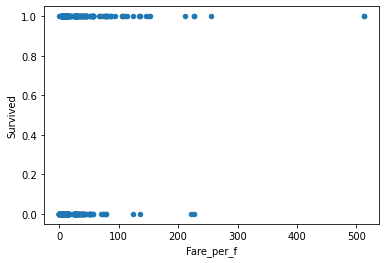

In [44]:
df_analyses[['Fare_per_f', 'Survived']].plot(kind='scatter', x='Fare_per_f', y='Survived')

This feature does not seems to be a good predictor.

#### Cabin

In [45]:
df_analyses['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
D              3
              ..
A19            1
E68            1
E50            1
A26            1
E38            1
Name: Cabin, Length: 147, dtype: int64

In [46]:
df_analyses.loc[df_analyses['Cabin'].isna(), 'Pclass'].value_counts()/[491, 184, 216]

3    0.975560
2    0.913043
1    0.185185
Name: Pclass, dtype: float64

In [47]:
df_analyses.loc[df_analyses['Cabin'].isna(), 'Survived'].value_counts()/[549, 342]

0    0.876138
1    0.602339
Name: Survived, dtype: float64

This feature is difficult to use because there are plenty (687, 52%) of missing values and they are absolutely not well distributed among classes, nor survivors.

#### Embarked

In [48]:
df_analyses['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

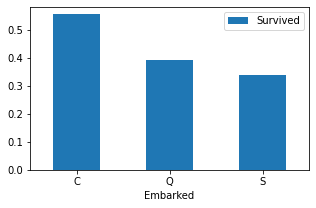

In [49]:
fig, axs = plt.subplots(1,1, figsize=(5,3))
df_analyses[['Embarked', 'Survived']].groupby('Embarked').mean().plot(kind='bar', ax=axs)
labels=axs.get_xticklabels()
axs.set_xticklabels(labels, rotation=0)
None

This feature seems to be a good predictor. And we will replace the missing values by the most common one: 'S'.

## Data preprocessing

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import KFold

We will do the following preprocessing steps:

1. **adding new features**: binning the age, creating the prefix feature, replacing the values for the sex feature
1. **filling the missing values**: following what is explain above
2. **dealing with categorical values**: to create dummies variables for these features
3. **selecting features and scaling them**: to select the features used and to scale them

In [51]:
# binning the age

class FeatureAdder(BaseEstimator, TransformerMixin):
    def fit(self, df, y=None):
        return self
    def transform(self, df, y=None):
        df2=df.copy()
        
        # binning the age
        df2['Age_binned']=df2['Age'].apply(lambda x: x//5)
        
        # creating the prefix feature
        df2['Prefix']=df2['Name'].apply(lambda x: x.split(',')[1].split(' ')[1])
        classic_titles=['Mr.', 'Mrs.', 'Miss.', 'Mlle.', 'Mme.', 'Ms.']
        non_classic_titles=[t for t in df2['Prefix'].unique() if t not in classic_titles]
        values={'Mlle.': 'Miss.', 'Mme.': 'Mrs.', 'Ms.': 'Miss.'}
        for t in non_classic_titles:
            values[t]='Spec.'
        df2['Prefix'].replace(values, inplace=True)
        
        # replacing sex values
        df2['Sex'].replace({'male':1, 'female':0}, inplace=True)
        
        return df2

        
# filling the missing values

class NAFiller(BaseEstimator, TransformerMixin):
    def fit(self, df, y=None):
        return self
    def transform(self, df, y=None):
        df2=df.copy()
        
        # Age_binned: filling with the new_age function
        def new_age(row):
            c, s, _ = row
            if (c, s) == (1, 0):
                return 7
            if (c,s)==(1, 1):
                return 8
            if (c,s)==(2, 0):
                return 5
            if (c,s)==(2, 1):
                return 6
            if (c,s)==(3, 0):
                return 4
            if (c,s)==(3, 1):
                return 5
            
        df2.loc[df2['Age_binned'].isna(), 'Age_binned'] = \
          df2.loc[df2['Age_binned'].isna(), ['Pclass', 'Sex', 'Age_binned']].apply(new_age, axis=1)
        
        # Embarked: filling with 'S'
        df2['Embarked'].fillna('S', inplace=True)
        
        return df2
        

# creating dummies variables

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features=features
    def fit(self, df, y=None):
        return self
    def transform(self, df, y=None):
        df2=df.copy()
        
        for f in self.features:
            enc=OneHotEncoder()
            enc.fit(df2[f].values.reshape(-1,1))
            categories=enc.categories_[0]
            array=enc.transform(df2[f].values.reshape(-1,1)).toarray()
            for i,cat in enumerate(categories):
                df2['{}_{}'.format(f, cat)]=array[:,i]
        
        df2.drop(columns=self.features, inplace=True)
        
        return df2


# selecting features

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features=features
    def fit(self, df, y=None):
        return self
    def transform(self, df, y=None):
        df2=df.copy()
        X=df2[self.features].values
        return X
    

In [52]:
df_train_nooutliers=df_train.loc[df_train['Age']<80,:].copy()

In [53]:
features_for_ml=['Sex', 'SibSp', 'Parch', 'Age_binned', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Prefix_Miss.', \
  'Prefix_Mr.', 'Prefix_Mrs.', 'Prefix_Spec.', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [54]:
pipeline_for_ML=Pipeline([
    ('feature_adder', FeatureAdder()),
    ('na_filler', NAFiller()),
    ('categorica_encoder', CategoricalEncoder(features=['Pclass', 'Prefix', 'Embarked'])),
    ('feature_selector', FeatureSelector(features=features_for_ml)),
    ('standard_scaler', StandardScaler()),
])

X=pipeline_for_ML.fit_transform(df_train_nooutliers)
y=df_train_nooutliers['Survived'].values

## Data training

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

### Some useful functions

In [56]:
def hyperparameter_tuning(estimator, hyperparameter, hp_range, X, y):
    kf=KFold(n_splits=5, shuffle=True, random_state=19)
    
    Mean_train, Mean_test = [], []
    Std_train, Std_test = [], []
    
    dinit=datetime.today()
    print('Begining work at {}\n '.format(dinit.strftime('%Y-%m-%d %H:%M:%S')))
    
    for j,hp in enumerate(hp_range):
        d0=datetime.today()
        print('\tBeginning job {} on {}...'.format(j+1, len(hp_range)))
        estimator.__dict__[hyperparameter]=hp
        
        score_train=[]
        score_test=[]
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            estimator.fit(X_train, y_train)
            ytrainpred=estimator.predict(X_train)
            ytestpred=estimator.predict(X_test)
            score_train.append(accuracy_score(y_train, ytrainpred))
            score_test.append(accuracy_score(y_test, ytestpred))
        
        Mean_train.append(np.mean(score_train))
        Mean_test.append(np.mean(score_test))
        Std_train.append(np.std(score_train))
        Std_test.append(np.std(score_test))
        
        d1=datetime.today()
        m,s=(d1-d0).seconds//60, (d1-d0).seconds%60
        print('\t\t... duration: {}min {}s'.format(m,s))
     
    dend=datetime.today()
    m,s=(dend-dinit).seconds//60, (dend-dinit).seconds%60
    print('\nTotal duration:{}min {}s'.format(m,s))
        
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    
    ax.plot(hp_range, Mean_train, color='b', marker='+', label='train')
    ax.plot(hp_range, [m-s for (m,s) in zip(Mean_train,Std_train)], color='b', linestyle='--')
    ax.plot(hp_range, [m+s for (m,s) in zip(Mean_train,Std_train)], color='b', linestyle='--')
    
    ax.plot(hp_range, Mean_test, color='r', marker='+', label='test')
    ax.plot(hp_range, [m-s for (m,s) in zip(Mean_test,Std_test)], color='r', linestyle='--')
    ax.plot(hp_range, [m+s for (m,s) in zip(Mean_test,Std_test)], color='r', linestyle='--')
    
    ax.set_xlabel('{} range'.format(hyperparameter))
    ax.set_ylabel('Score')
    ax.legend()
    
    fig.suptitle('Accuracy score of a {} for different values of {}'.format(estimator.__class__.__name__, hyperparameter))

    return Mean_test, Std_test

### DecisionTree

##### max_depth

Begining work at 2020-10-13 19:28:40
 
	Beginning job 1 on 9...
		... duration: 0min 0s
	Beginning job 2 on 9...
		... duration: 0min 0s
	Beginning job 3 on 9...
		... duration: 0min 0s
	Beginning job 4 on 9...
		... duration: 0min 0s
	Beginning job 5 on 9...
		... duration: 0min 0s
	Beginning job 6 on 9...
		... duration: 0min 0s
	Beginning job 7 on 9...
		... duration: 0min 0s
	Beginning job 8 on 9...
		... duration: 0min 0s
	Beginning job 9 on 9...
		... duration: 0min 0s

Total duration:0min 0s


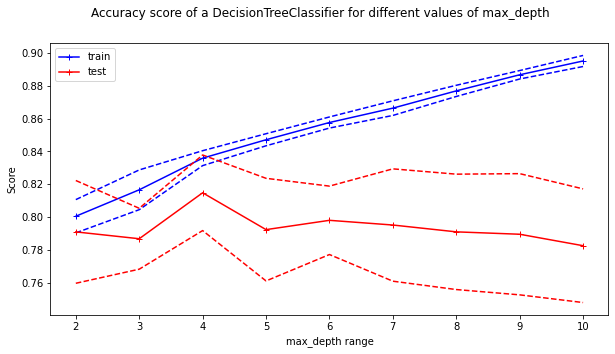

In [57]:
hp_range=[int(i) for i in np.linspace(2,10, 9)]

mean_accuracy_test, std_accuracy_test = hyperparameter_tuning(
    estimator=DecisionTreeClassifier(), 
    hyperparameter='max_depth', 
    hp_range=hp_range, 
    X=X, 
    y=y,
)

In [58]:
opt_ind=2

In [59]:
round(mean_accuracy_test[opt_ind]*100, 1), round(std_accuracy_test[opt_ind]*100, 1)

(81.5, 2.3)

In [60]:
best_hp_value=hp_range[opt_ind]
best_hp_value

4

##### max_leaf_nodes

Begining work at 2020-10-13 19:28:40
 
	Beginning job 1 on 20...
		... duration: 0min 0s
	Beginning job 2 on 20...
		... duration: 0min 0s
	Beginning job 3 on 20...
		... duration: 0min 0s
	Beginning job 4 on 20...
		... duration: 0min 0s
	Beginning job 5 on 20...
		... duration: 0min 0s
	Beginning job 6 on 20...
		... duration: 0min 0s
	Beginning job 7 on 20...
		... duration: 0min 0s
	Beginning job 8 on 20...
		... duration: 0min 0s
	Beginning job 9 on 20...
		... duration: 0min 0s
	Beginning job 10 on 20...
		... duration: 0min 0s
	Beginning job 11 on 20...
		... duration: 0min 0s
	Beginning job 12 on 20...
		... duration: 0min 0s
	Beginning job 13 on 20...
		... duration: 0min 0s
	Beginning job 14 on 20...
		... duration: 0min 0s
	Beginning job 15 on 20...
		... duration: 0min 0s
	Beginning job 16 on 20...
		... duration: 0min 0s
	Beginning job 17 on 20...
		... duration: 0min 0s
	Beginning job 18 on 20...
		... duration: 0min 0s
	Beginning job 19 on 20...
		... duration: 0min 0s
	

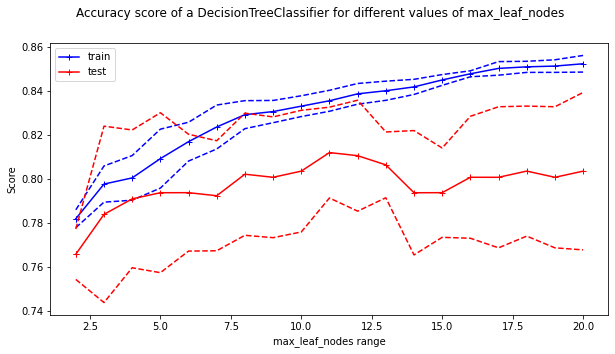

In [61]:
hp_range=[int(i) for i in np.linspace(2,20, 20)]

mean_accuracy_test, std_accuracy_test = hyperparameter_tuning(
    estimator=DecisionTreeClassifier(), 
    hyperparameter='max_leaf_nodes', 
    hp_range=hp_range, 
    X=X, 
    y=y,
)

In [62]:
opt_ind=9

In [63]:
round(mean_accuracy_test[opt_ind]*100, 1), round(std_accuracy_test[opt_ind]*100, 1)

(80.4, 2.8)

In [64]:
best_hp_value=hp_range[opt_ind]
best_hp_value

10

### RandomForest

##### max_depth

Begining work at 2020-10-13 19:28:40
 
	Beginning job 1 on 9...
		... duration: 0min 0s
	Beginning job 2 on 9...
		... duration: 0min 0s
	Beginning job 3 on 9...
		... duration: 0min 0s
	Beginning job 4 on 9...
		... duration: 0min 0s
	Beginning job 5 on 9...
		... duration: 0min 0s
	Beginning job 6 on 9...
		... duration: 0min 0s
	Beginning job 7 on 9...
		... duration: 0min 0s
	Beginning job 8 on 9...
		... duration: 0min 0s
	Beginning job 9 on 9...
		... duration: 0min 0s

Total duration:0min 5s


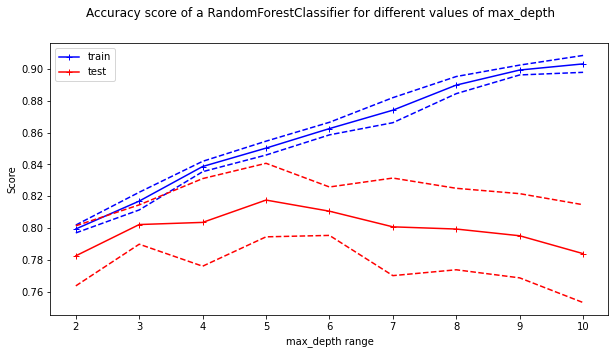

In [65]:
hp_range=[int(i) for i in np.linspace(2,10, 9)]

mean_accuracy_test, std_accuracy_test = hyperparameter_tuning(
    estimator=RandomForestClassifier(random_state=19), 
    hyperparameter='max_depth', 
    hp_range=hp_range, 
    X=X, 
    y=y,
)

In [66]:
opt_ind=3

In [67]:
round(mean_accuracy_test[opt_ind]*100, 1), round(std_accuracy_test[opt_ind]*100, 1)

(81.8, 2.3)

In [68]:
best_hp_value=hp_range[opt_ind]
best_hp_value

5

##### max_leaf_nodes

Begining work at 2020-10-13 19:28:46
 
	Beginning job 1 on 18...
		... duration: 0min 0s
	Beginning job 2 on 18...
		... duration: 0min 0s
	Beginning job 3 on 18...
		... duration: 0min 0s
	Beginning job 4 on 18...
		... duration: 0min 0s
	Beginning job 5 on 18...
		... duration: 0min 0s
	Beginning job 6 on 18...
		... duration: 0min 0s
	Beginning job 7 on 18...
		... duration: 0min 0s
	Beginning job 8 on 18...
		... duration: 0min 0s
	Beginning job 9 on 18...
		... duration: 0min 0s
	Beginning job 10 on 18...
		... duration: 0min 0s
	Beginning job 11 on 18...
		... duration: 0min 0s
	Beginning job 12 on 18...
		... duration: 0min 0s
	Beginning job 13 on 18...
		... duration: 0min 0s
	Beginning job 14 on 18...
		... duration: 0min 0s
	Beginning job 15 on 18...
		... duration: 0min 0s
	Beginning job 16 on 18...
		... duration: 0min 0s
	Beginning job 17 on 18...
		... duration: 0min 0s
	Beginning job 18 on 18...
		... duration: 0min 0s

Total duration:0min 11s


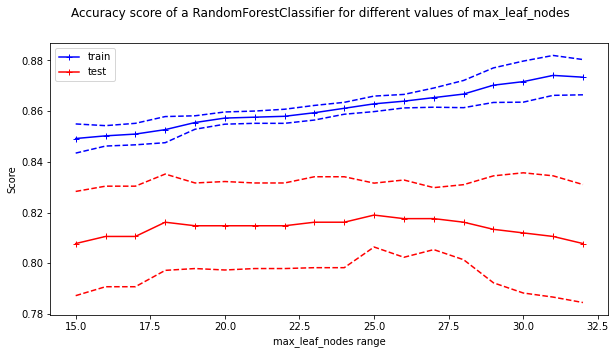

In [69]:
hp_range=[int(i) for i in np.linspace(15,32, 18)]

mean_accuracy_test, std_accuracy_test = hyperparameter_tuning(
    estimator=RandomForestClassifier(random_state=19), 
    hyperparameter='max_leaf_nodes', 
    hp_range=hp_range, 
    X=X, 
    y=y,
)

In [70]:
opt_ind=-8

In [71]:
round(mean_accuracy_test[opt_ind]*100, 1), round(std_accuracy_test[opt_ind]*100, 1)

(81.9, 1.3)

In [72]:
best_hp_value=hp_range[opt_ind]
best_hp_value

25

### ExtraTreesClassifier

##### max_depth

Begining work at 2020-10-13 19:28:58
 
	Beginning job 1 on 9...
		... duration: 0min 0s
	Beginning job 2 on 9...
		... duration: 0min 0s
	Beginning job 3 on 9...
		... duration: 0min 0s
	Beginning job 4 on 9...
		... duration: 0min 0s
	Beginning job 5 on 9...
		... duration: 0min 0s
	Beginning job 6 on 9...
		... duration: 0min 0s
	Beginning job 7 on 9...
		... duration: 0min 0s
	Beginning job 8 on 9...
		... duration: 0min 0s
	Beginning job 9 on 9...
		... duration: 0min 0s

Total duration:0min 4s


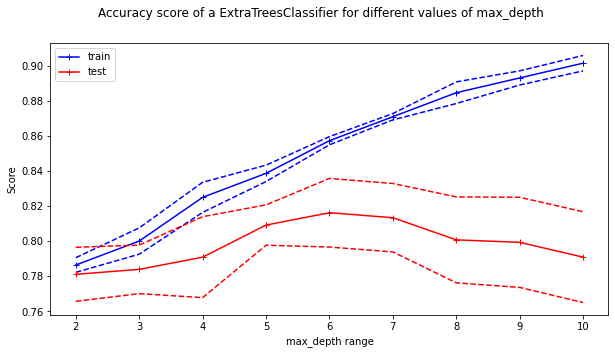

In [73]:
hp_range=[int(i) for i in np.linspace(2,10, 9)]

mean_accuracy_test, std_accuracy_test = hyperparameter_tuning(
    estimator=ExtraTreesClassifier(random_state=19), 
    hyperparameter='max_depth', 
    hp_range=hp_range, 
    X=X, 
    y=y,
)

In [74]:
opt_ind=4

In [75]:
round(mean_accuracy_test[opt_ind]*100, 1), round(std_accuracy_test[opt_ind]*100, 1)

(81.6, 2.0)

In [76]:
best_hp_value=hp_range[opt_ind]
best_hp_value

6

##### max_leaf_nodes

Begining work at 2020-10-13 19:29:03
 
	Beginning job 1 on 13...
		... duration: 0min 0s
	Beginning job 2 on 13...
		... duration: 0min 0s
	Beginning job 3 on 13...
		... duration: 0min 0s
	Beginning job 4 on 13...
		... duration: 0min 0s
	Beginning job 5 on 13...
		... duration: 0min 0s
	Beginning job 6 on 13...
		... duration: 0min 0s
	Beginning job 7 on 13...
		... duration: 0min 0s
	Beginning job 8 on 13...
		... duration: 0min 0s
	Beginning job 9 on 13...
		... duration: 0min 0s
	Beginning job 10 on 13...
		... duration: 0min 0s
	Beginning job 11 on 13...
		... duration: 0min 0s
	Beginning job 12 on 13...
		... duration: 0min 0s
	Beginning job 13 on 13...
		... duration: 0min 0s

Total duration:0min 6s


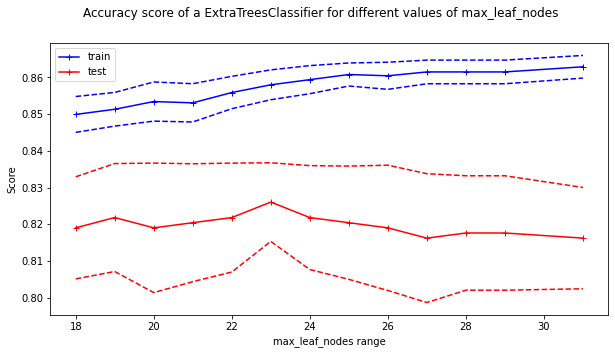

In [77]:
hp_range=[int(i) for i in np.linspace(18,31, (31-18))]

mean_accuracy_test, std_accuracy_test = hyperparameter_tuning(
    estimator=ExtraTreesClassifier(random_state=19), 
    hyperparameter='max_leaf_nodes', 
    hp_range=hp_range, 
    X=X, 
    y=y,
)

In [78]:
opt_ind=5

In [79]:
round(mean_accuracy_test[opt_ind]*100, 2), round(std_accuracy_test[opt_ind]*100, 1)

(82.61, 1.1)

In [80]:
best_hp_value=hp_range[opt_ind]
best_hp_value

23

### GradientBoosting

Begining work at 2020-10-13 19:29:10
 
	Beginning job 1 on 28...
		... duration: 0min 0s
	Beginning job 2 on 28...
		... duration: 0min 0s
	Beginning job 3 on 28...
		... duration: 0min 0s
	Beginning job 4 on 28...
		... duration: 0min 0s
	Beginning job 5 on 28...
		... duration: 0min 0s
	Beginning job 6 on 28...
		... duration: 0min 0s
	Beginning job 7 on 28...
		... duration: 0min 0s
	Beginning job 8 on 28...
		... duration: 0min 0s
	Beginning job 9 on 28...
		... duration: 0min 0s
	Beginning job 10 on 28...
		... duration: 0min 0s
	Beginning job 11 on 28...
		... duration: 0min 0s
	Beginning job 12 on 28...
		... duration: 0min 0s
	Beginning job 13 on 28...
		... duration: 0min 0s
	Beginning job 14 on 28...
		... duration: 0min 0s
	Beginning job 15 on 28...
		... duration: 0min 0s
	Beginning job 16 on 28...
		... duration: 0min 0s
	Beginning job 17 on 28...
		... duration: 0min 0s
	Beginning job 18 on 28...
		... duration: 0min 0s
	Beginning job 19 on 28...
		... duration: 0min 0s
	

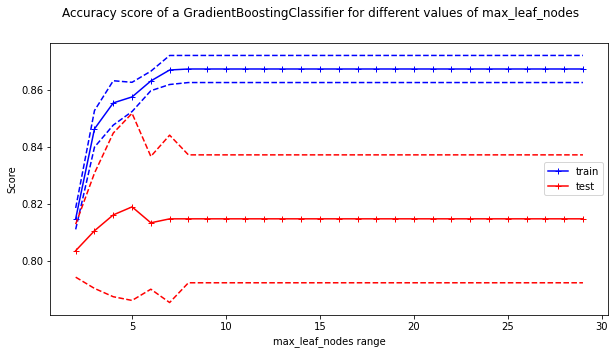

In [81]:
hp_range=range(2,30)

mean_accuracy_test, std_accuracy_test = hyperparameter_tuning(
    estimator=GradientBoostingClassifier(random_state=19), 
    hyperparameter='max_leaf_nodes', 
    hp_range=hp_range, 
    X=X, 
    y=y,
)

In [82]:
opt_ind=3

In [83]:
round(mean_accuracy_test[opt_ind]*100, 1), round(std_accuracy_test[opt_ind]*100, 1)

(81.9, 3.3)

In [84]:
best_hp_value=hp_range[opt_ind]
best_hp_value

5

### KNN

Begining work at 2020-10-13 19:29:18
 
	Beginning job 1 on 28...
		... duration: 0min 0s
	Beginning job 2 on 28...
		... duration: 0min 0s
	Beginning job 3 on 28...
		... duration: 0min 0s
	Beginning job 4 on 28...
		... duration: 0min 0s
	Beginning job 5 on 28...
		... duration: 0min 0s
	Beginning job 6 on 28...
		... duration: 0min 0s
	Beginning job 7 on 28...
		... duration: 0min 0s
	Beginning job 8 on 28...
		... duration: 0min 0s
	Beginning job 9 on 28...
		... duration: 0min 0s
	Beginning job 10 on 28...
		... duration: 0min 0s
	Beginning job 11 on 28...
		... duration: 0min 0s
	Beginning job 12 on 28...
		... duration: 0min 0s
	Beginning job 13 on 28...
		... duration: 0min 0s
	Beginning job 14 on 28...
		... duration: 0min 0s
	Beginning job 15 on 28...
		... duration: 0min 0s
	Beginning job 16 on 28...
		... duration: 0min 0s
	Beginning job 17 on 28...
		... duration: 0min 0s
	Beginning job 18 on 28...
		... duration: 0min 0s
	Beginning job 19 on 28...
		... duration: 0min 0s
	

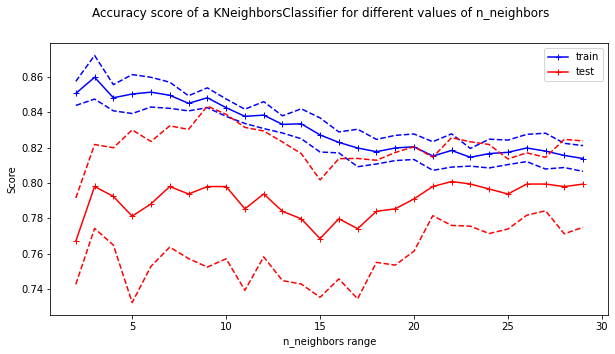

In [85]:
hp_range=range(2,30)

mean_accuracy_test, std_accuracy_test = hyperparameter_tuning(
    estimator=KNeighborsClassifier(), 
    hyperparameter='n_neighbors', 
    hp_range=hp_range, 
    X=X, 
    y=y,
)

In [86]:
opt_ind=1

In [87]:
round(mean_accuracy_test[opt_ind]*100, 1), round(std_accuracy_test[opt_ind]*100, 1)

(79.8, 2.4)

In [88]:
best_hp_value=hp_range[opt_ind]
best_hp_value

3

### SGDClassifier

Begining work at 2020-10-13 19:29:22
 
	Beginning job 1 on 20...
		... duration: 0min 0s
	Beginning job 2 on 20...
		... duration: 0min 0s
	Beginning job 3 on 20...
		... duration: 0min 0s
	Beginning job 4 on 20...
		... duration: 0min 0s
	Beginning job 5 on 20...
		... duration: 0min 0s
	Beginning job 6 on 20...
		... duration: 0min 0s
	Beginning job 7 on 20...
		... duration: 0min 0s
	Beginning job 8 on 20...
		... duration: 0min 0s
	Beginning job 9 on 20...
		... duration: 0min 0s
	Beginning job 10 on 20...
		... duration: 0min 0s
	Beginning job 11 on 20...
		... duration: 0min 0s
	Beginning job 12 on 20...
		... duration: 0min 0s
	Beginning job 13 on 20...
		... duration: 0min 0s
	Beginning job 14 on 20...
		... duration: 0min 0s
	Beginning job 15 on 20...
		... duration: 0min 0s
	Beginning job 16 on 20...
		... duration: 0min 0s
	Beginning job 17 on 20...
		... duration: 0min 0s
	Beginning job 18 on 20...
		... duration: 0min 0s
	Beginning job 19 on 20...
		... duration: 0min 0s
	

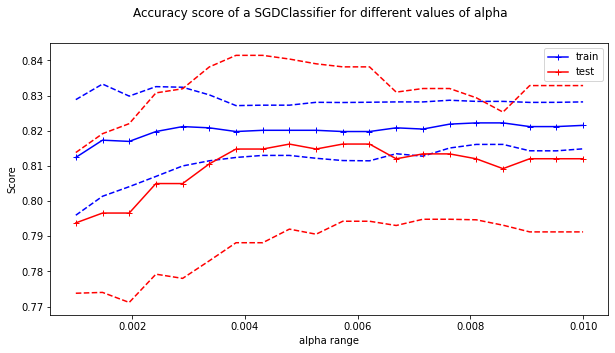

In [89]:
hp_range=np.linspace(0.001, 0.01, 20)

mean_accuracy_test, std_accuracy_test = hyperparameter_tuning(
    estimator=SGDClassifier(loss='log', random_state=19), 
    hyperparameter='alpha', 
    hp_range=hp_range, 
    X=X, 
    y=y,
)

In [90]:
opt_ind=-9

In [91]:
round(mean_accuracy_test[opt_ind]*100, 1), round(std_accuracy_test[opt_ind]*100, 1)

(81.6, 2.2)

In [92]:
best_hp_value=hp_range[opt_ind]
best_hp_value

0.0062105263157894745

### SVC

Begining work at 2020-10-13 19:29:23
 
	Beginning job 1 on 20...
		... duration: 0min 0s
	Beginning job 2 on 20...
		... duration: 0min 0s
	Beginning job 3 on 20...
		... duration: 0min 0s
	Beginning job 4 on 20...
		... duration: 0min 0s
	Beginning job 5 on 20...
		... duration: 0min 0s
	Beginning job 6 on 20...
		... duration: 0min 0s
	Beginning job 7 on 20...
		... duration: 0min 0s
	Beginning job 8 on 20...
		... duration: 0min 0s
	Beginning job 9 on 20...
		... duration: 0min 0s
	Beginning job 10 on 20...
		... duration: 0min 0s
	Beginning job 11 on 20...
		... duration: 0min 0s
	Beginning job 12 on 20...
		... duration: 0min 0s
	Beginning job 13 on 20...
		... duration: 0min 0s
	Beginning job 14 on 20...
		... duration: 0min 0s
	Beginning job 15 on 20...
		... duration: 0min 0s
	Beginning job 16 on 20...
		... duration: 0min 0s
	Beginning job 17 on 20...
		... duration: 0min 0s
	Beginning job 18 on 20...
		... duration: 0min 0s
	Beginning job 19 on 20...
		... duration: 0min 0s
	

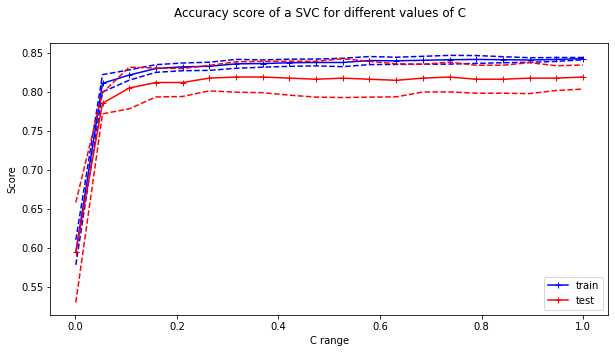

In [93]:
hp_range=np.linspace(0.001, 1, 20)

mean_accuracy_test, std_accuracy_test = hyperparameter_tuning(
    estimator=SVC(probability=True, random_state=19), 
    hyperparameter='C', 
    hp_range=hp_range, 
    X=X, 
    y=y,
)

In [94]:
opt_ind=6

In [95]:
round(mean_accuracy_test[opt_ind]*100, 1), round(std_accuracy_test[opt_ind]*100, 1)

(81.9, 1.9)

In [96]:
best_hp_value=hp_range[opt_ind]
best_hp_value

0.3164736842105263

### Voting classifier

In [97]:
ext=ExtraTreesClassifier(max_leaf_nodes=23, random_state=19)
knn=KNeighborsClassifier(n_neighbors=3)
sgdc=SGDClassifier(alpha=0.006, loss='log', random_state=19)
svc=SVC(C=0.32, probability=True, random_state=19)

voting_clf=VotingClassifier(estimators=[('ext', ext), ('knn', knn), ('sgdc', sgdc), ('svc', svc)])

Begining work at 2020-10-13 19:29:27
 
	Beginning job 1 on 2...
		... duration: 0min 0s
	Beginning job 2 on 2...
		... duration: 0min 0s

Total duration:0min 1s


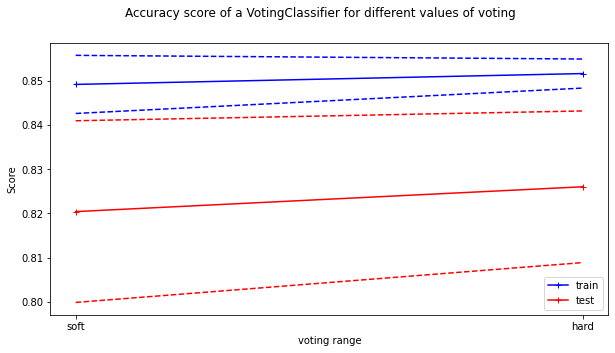

In [98]:
hp_range=['soft', 'hard']

mean_accuracy_test, std_accuracy_test = hyperparameter_tuning(
    estimator=voting_clf, 
    hyperparameter='voting', 
    hp_range=hp_range, 
    X=X, 
    y=y,
)

In [99]:
opt_ind=1

In [100]:
round(mean_accuracy_test[opt_ind]*100, 2), round(std_accuracy_test[opt_ind]*100, 1)

(82.61, 1.7)

In [101]:
best_hp_value=hp_range[opt_ind]
best_hp_value

'hard'

### Best estimator

| Estimator (hp)| Best_hp_value | Accuracy_mean | Accuracy_std
| :- | -: | :-: | :-:
| DecisionTree | max_depth = 4 | 81.5 | 2.3
RandomForest | max_leaf_nodes = 25 | 81.9 | 1.3
ExtraTrees | max_leaf_nodes = 23 | 82.6 | 1.1
GradientBoosting | max_leaf_nodes = 5 | 81.9 | 3.3
KNN | n_neighbors = 3 | 79.8 | 2.4
SGDC | alpha = 0.006 | 81.6 | 2.2
SVC | C = 0.32 | 81.9 | 1.9
Voting Clf | voting = hard | 82.6 | 1.7

The best estimator is the ExtraTrees with max_leaf_nodes = 23

In [102]:
ext=ExtraTreesClassifier(max_leaf_nodes=23, random_state=19)
ext.fit(X,y)

ExtraTreesClassifier(max_leaf_nodes=23, random_state=19)

## Prediction

In [103]:
df_test=pd.read_csv('./titanic/test.csv')

In [104]:
X_test=pipeline_for_ML.transform(df_test)

In [105]:
y_testpred=ext.predict(X_test)

In [106]:
df_ypred=df_test[['PassengerId']].set_index('PassengerId')
df_ypred['Survived']=y_testpred
df_ypred

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [107]:
df_ypred.to_csv('Submission.csv')